# SME0878 - Mineração Estatística de Dados

### **Nome do Aluno:  Aline Fernanda da Conceição** 

### **N.USP: 9437275** 


### **Nome do Aluno: William Luis Alves Ferreira** 

### **N.USP: 9847599** 

In [1]:
!pip install statistics --quiet

In [2]:
# biblioteca para o desenvolvimento do questionário

# Elementares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Q2
import seaborn as sns


# Q5
import statistics as std
import math

#Q9
import random
# Estabelecendo a semente para a variabilidade
random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Q10
import sklearn.datasets as skdata
from sklearn.neighbors import KernelDensity

#Q11
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from scipy.stats import shapiro


### Questão 2

In [3]:
data = pd.read_csv('./data/Vehicle.csv', header=(0))
data.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [4]:
Colunas = list(data.columns)
Colunas.pop()
Colunas

['Comp',
 'Circ',
 'D.Circ',
 'Rad.Ra',
 'Pr.Axis.Ra',
 'Max.L.Ra',
 'Scat.Ra',
 'Elong',
 'Pr.Axis.Rect',
 'Max.L.Rect',
 'Sc.Var.Maxis',
 'Sc.Var.maxis',
 'Ra.Gyr',
 'Skew.Maxis',
 'Skew.maxis',
 'Kurt.maxis',
 'Kurt.Maxis',
 'Holl.Ra']

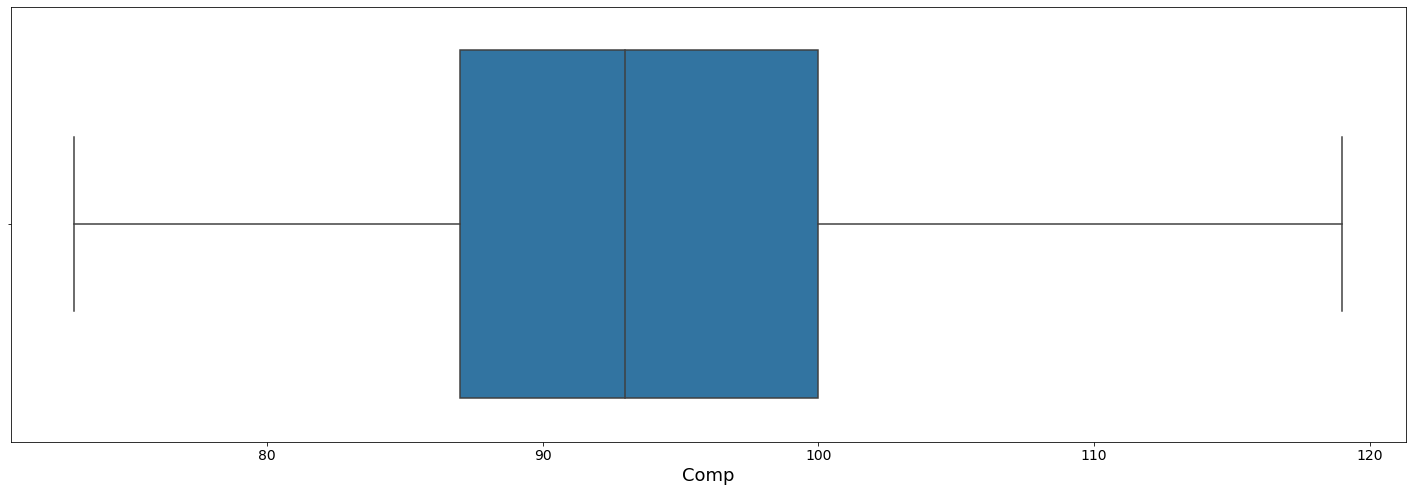

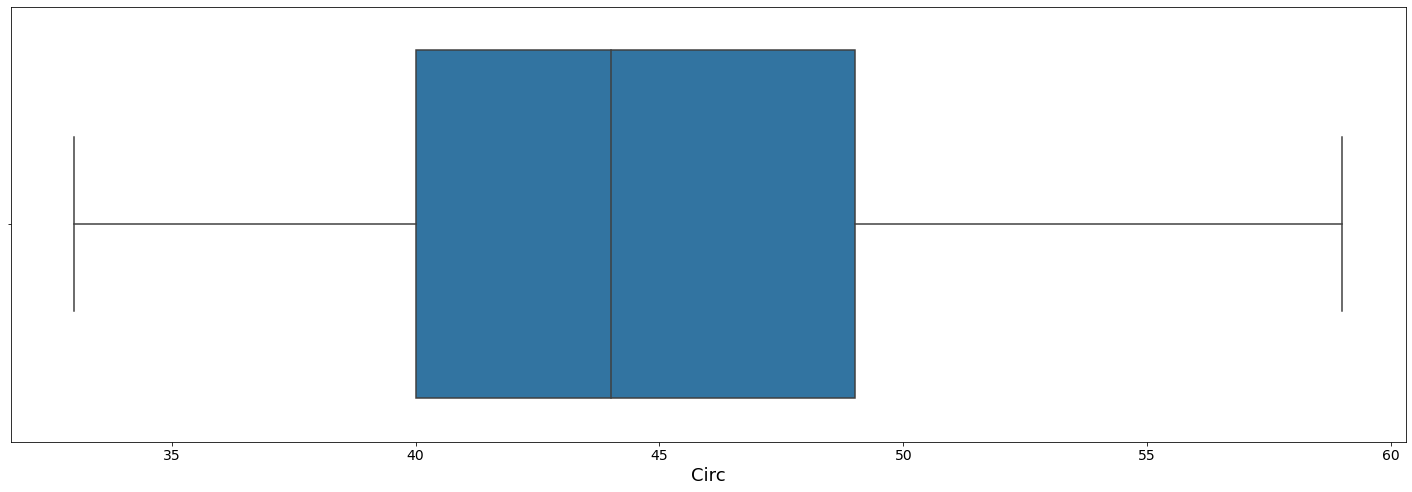

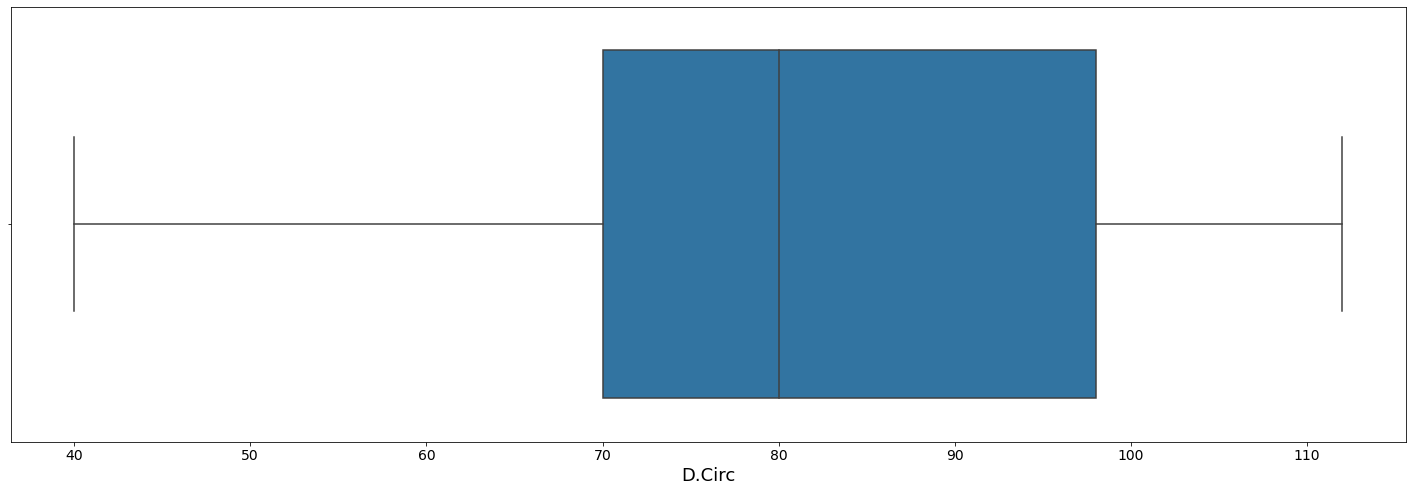

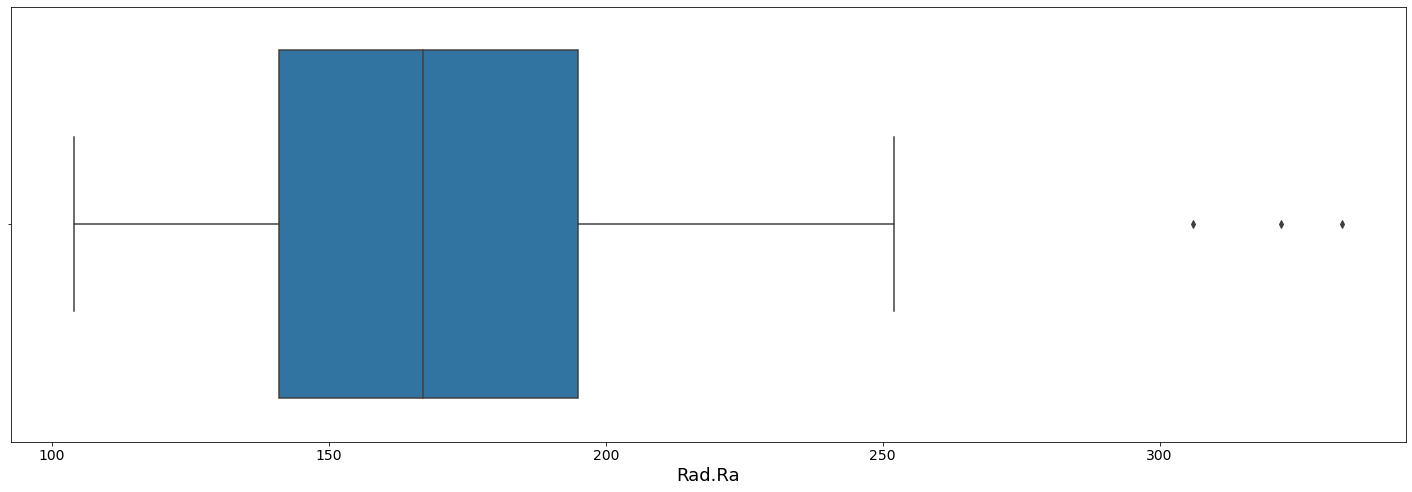

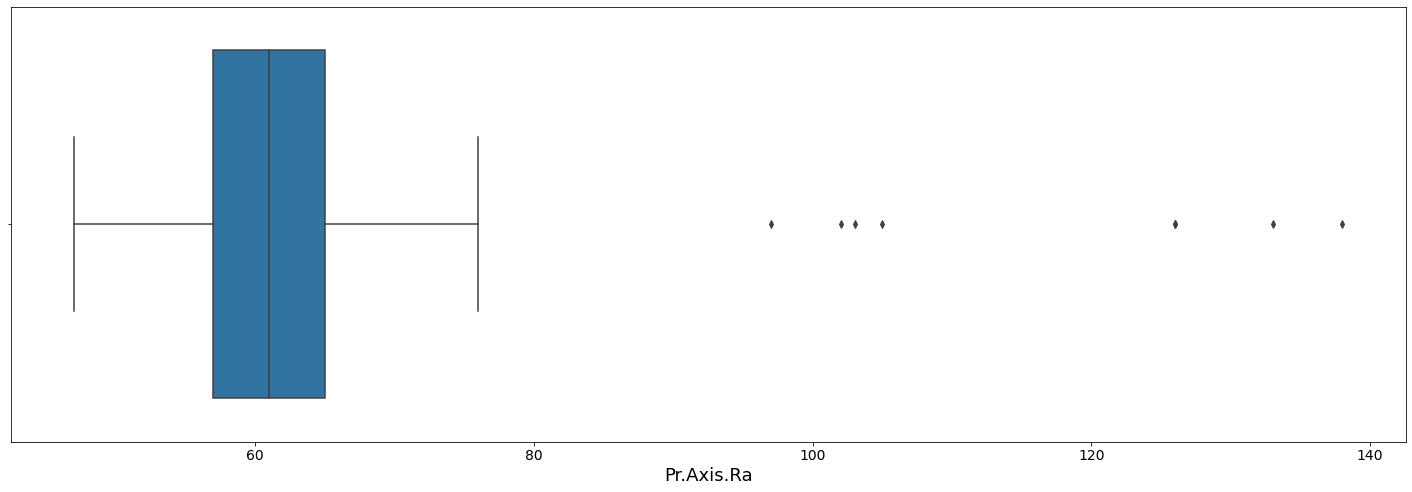

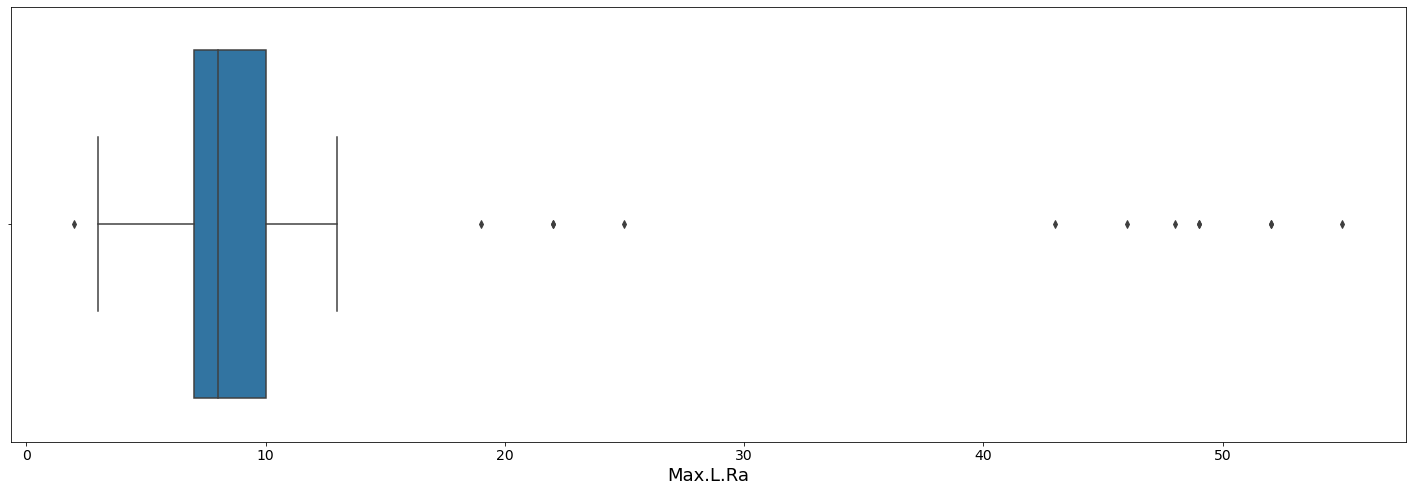

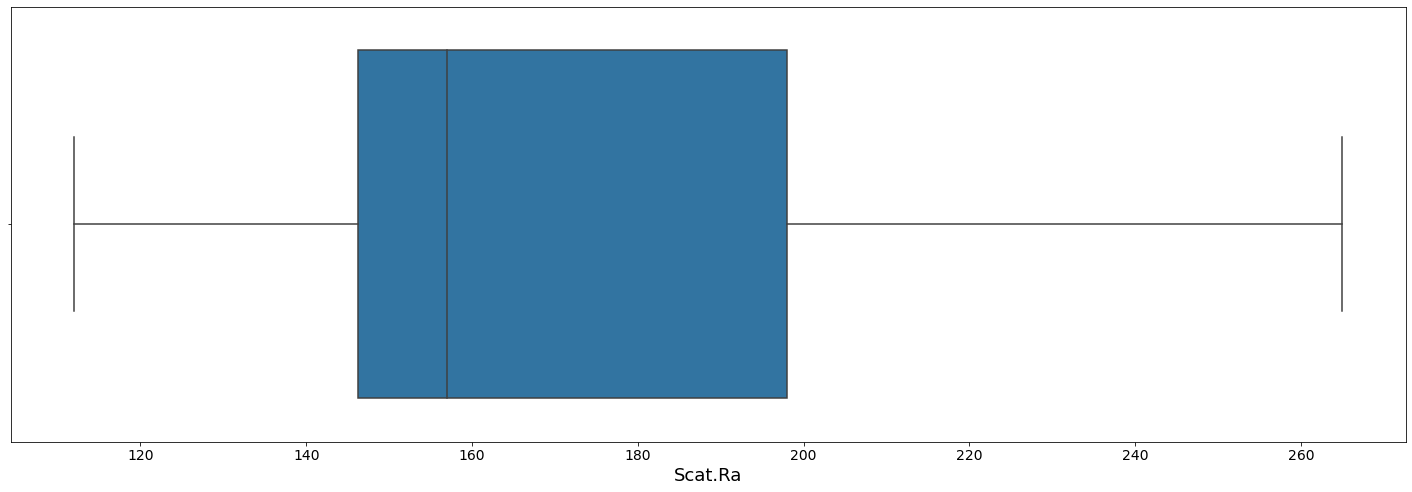

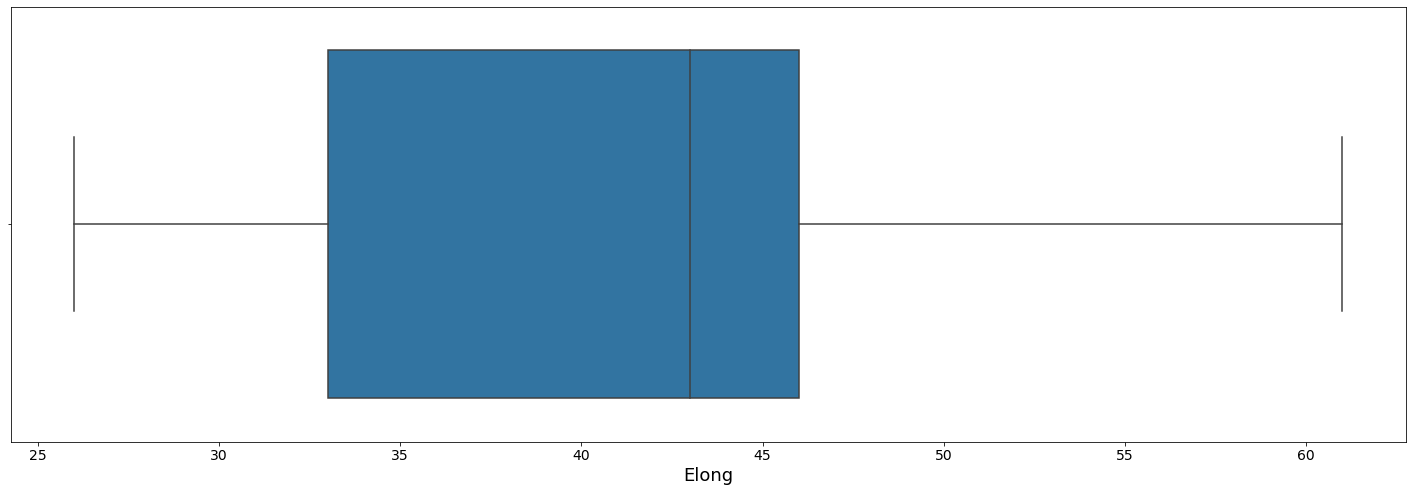

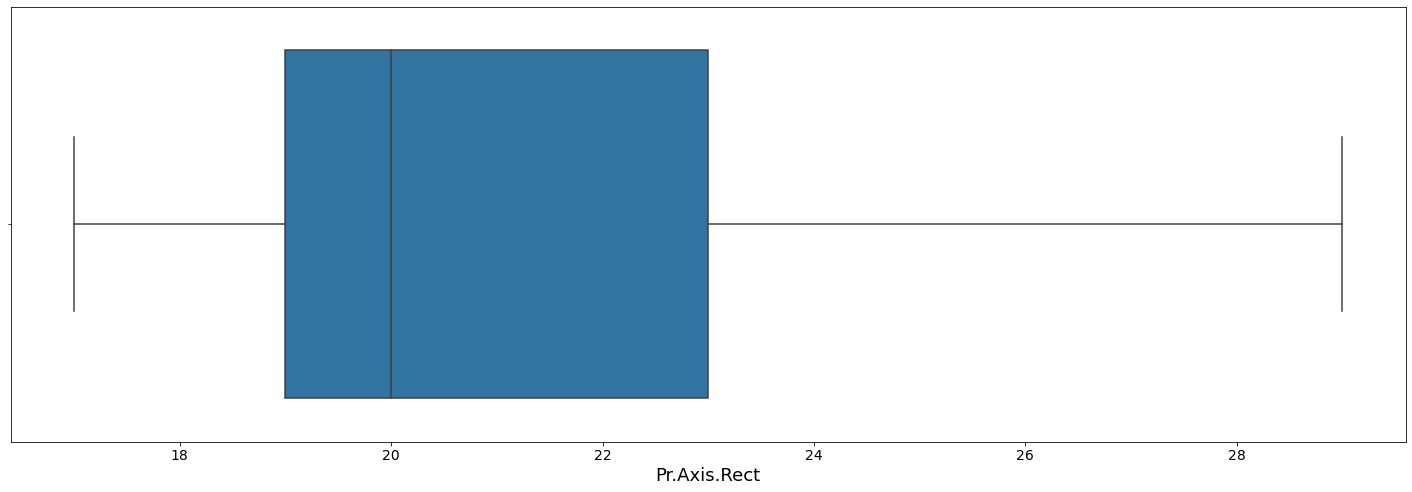

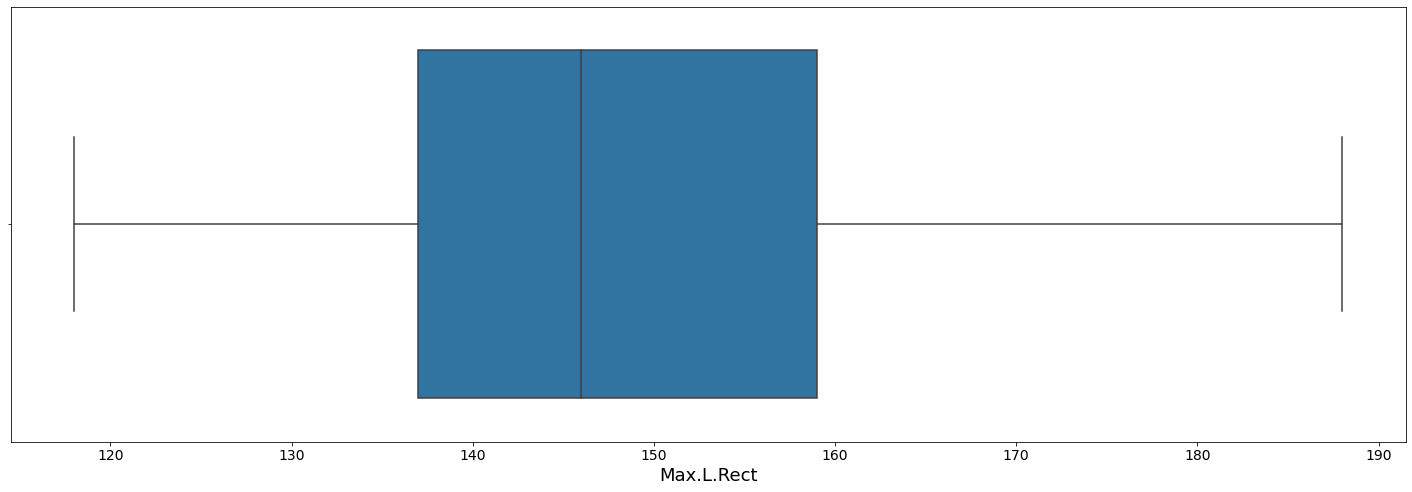

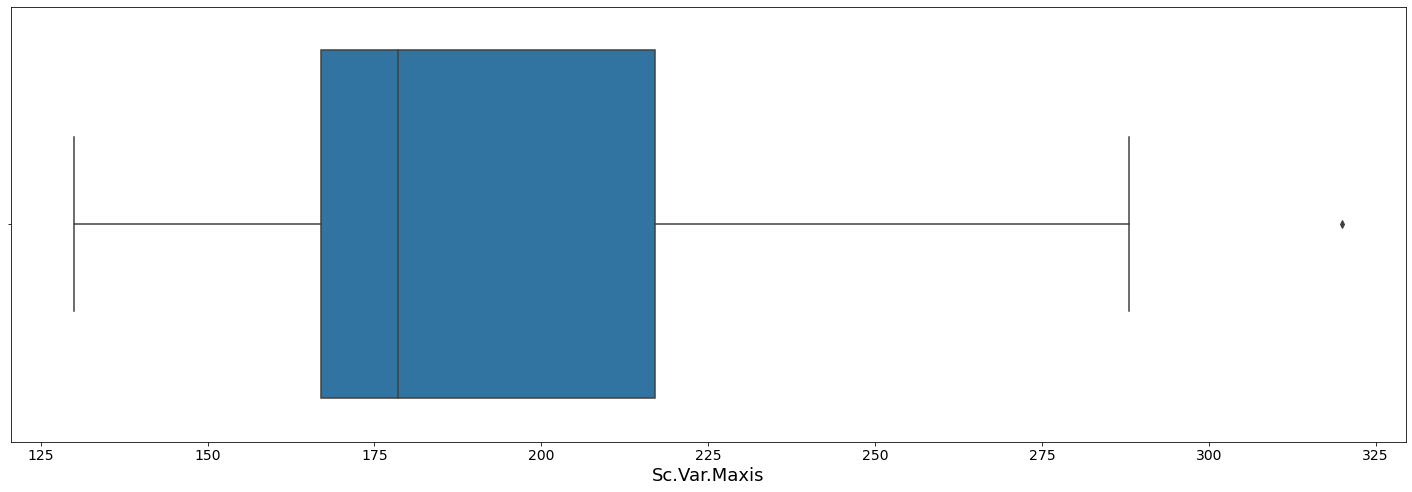

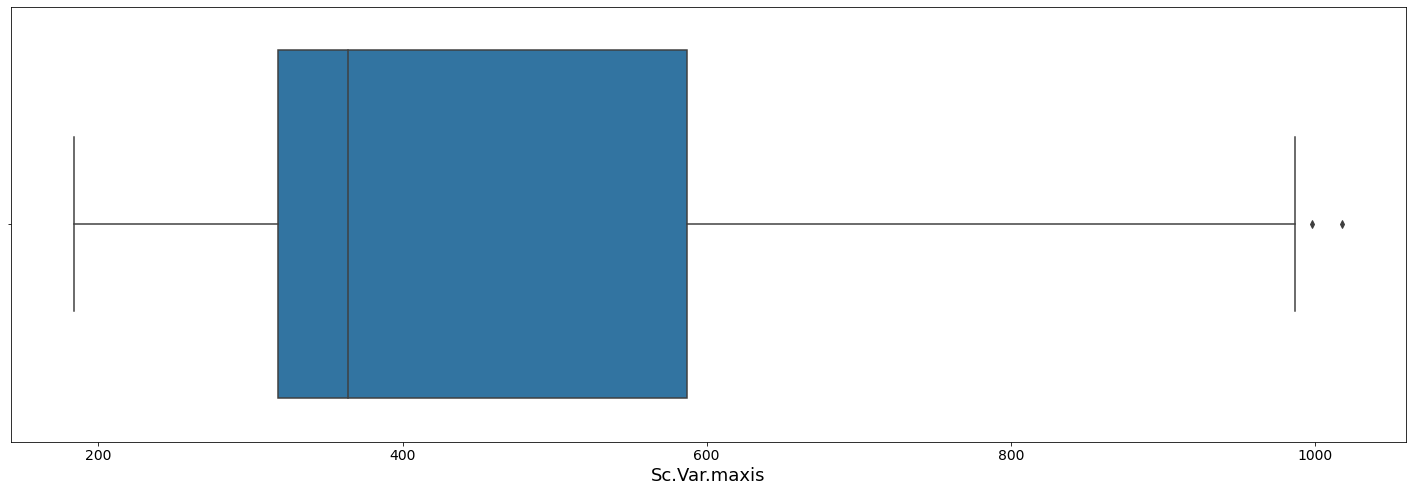

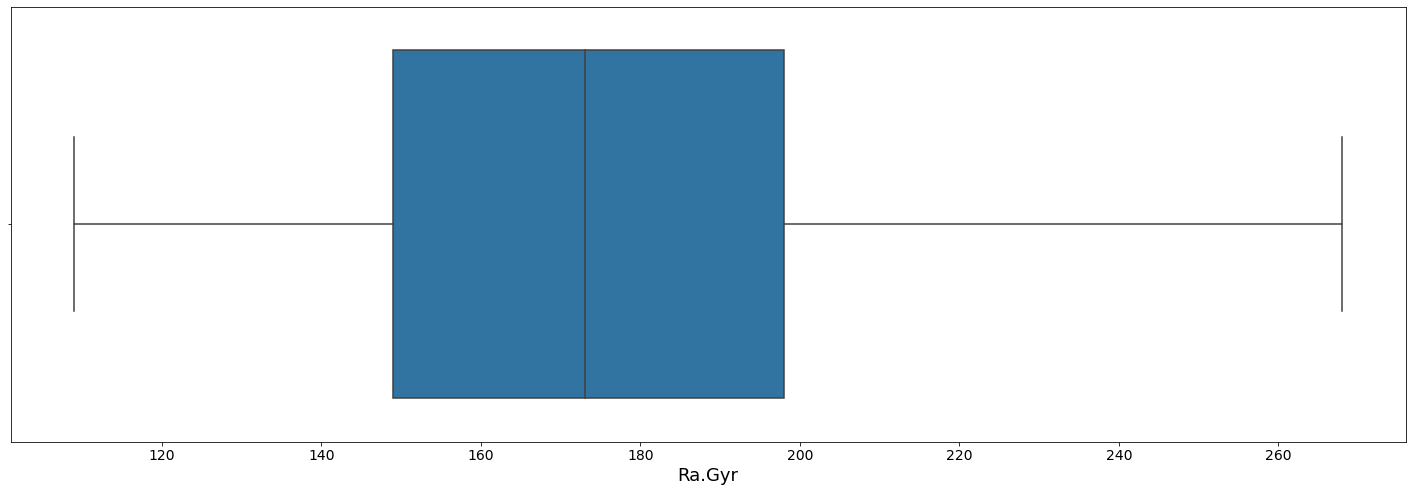

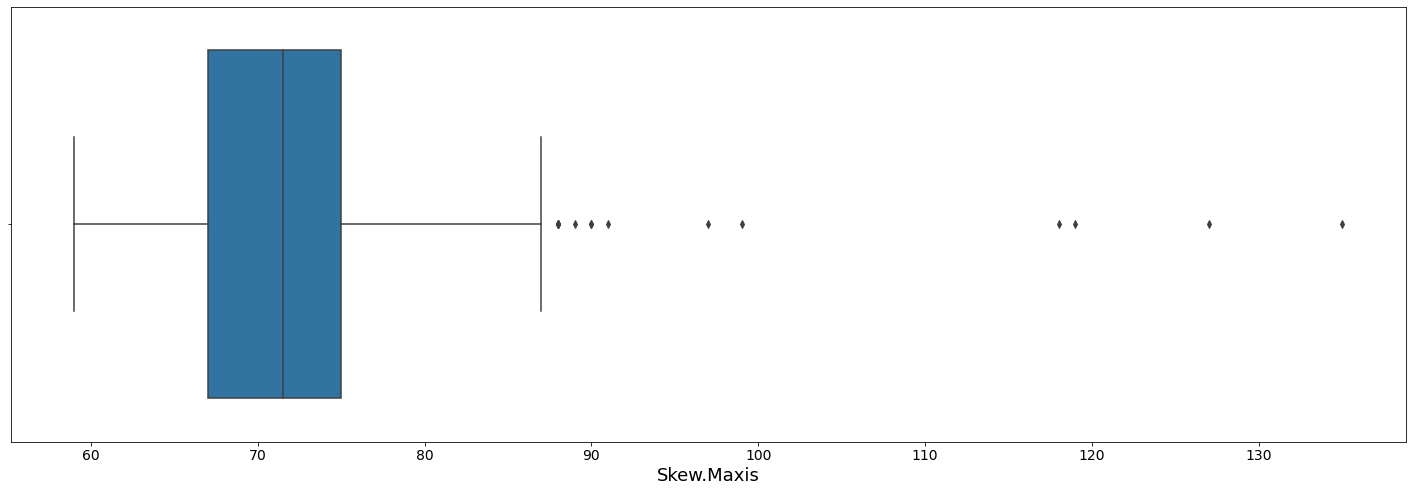

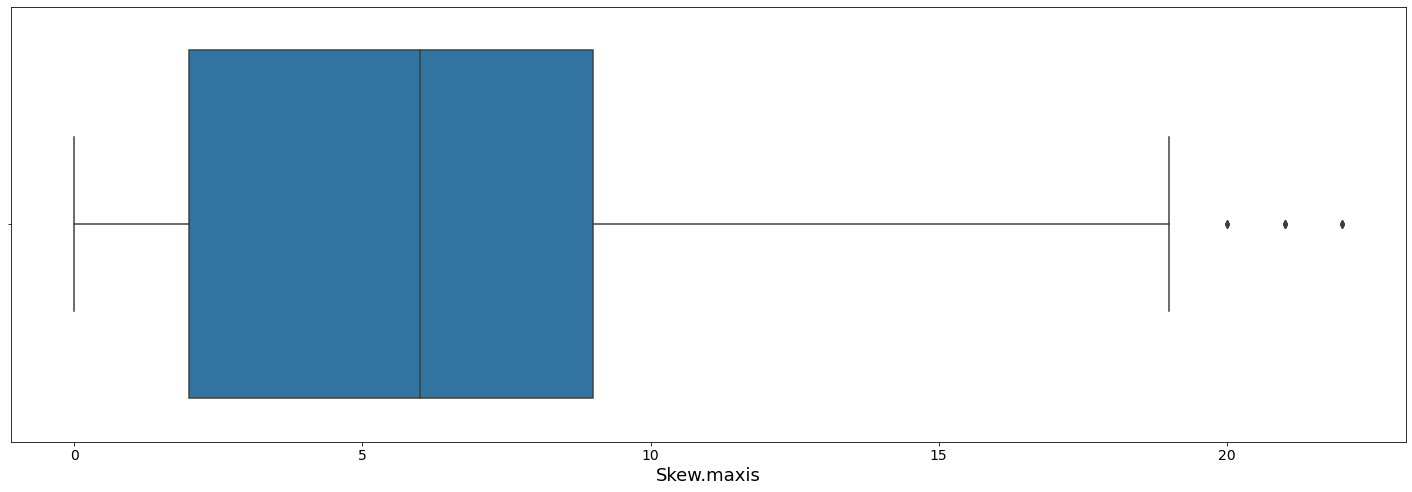

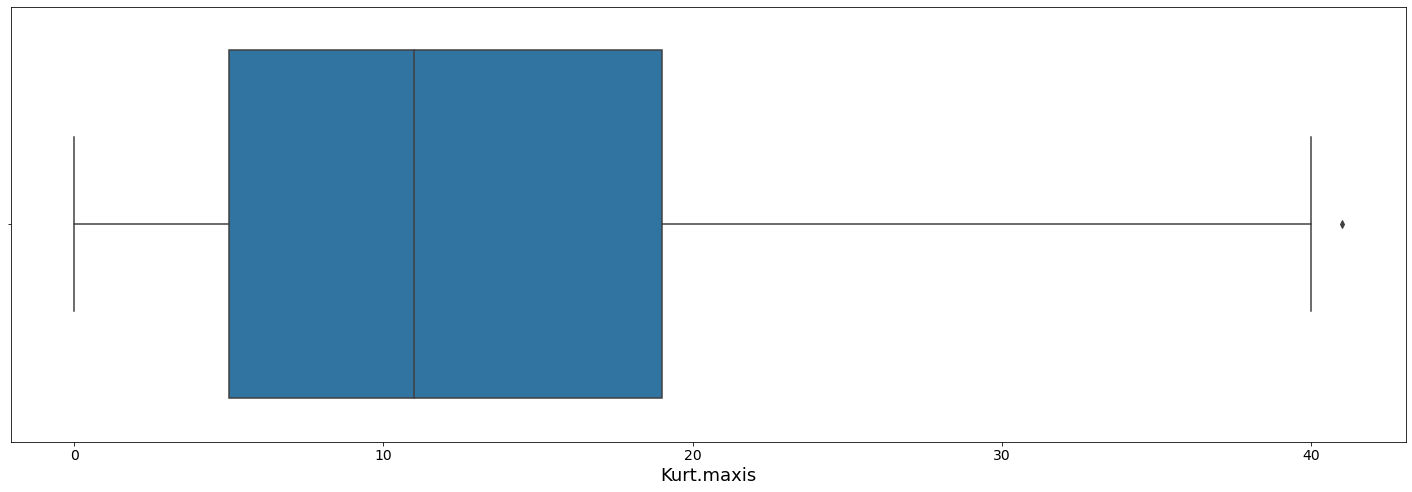

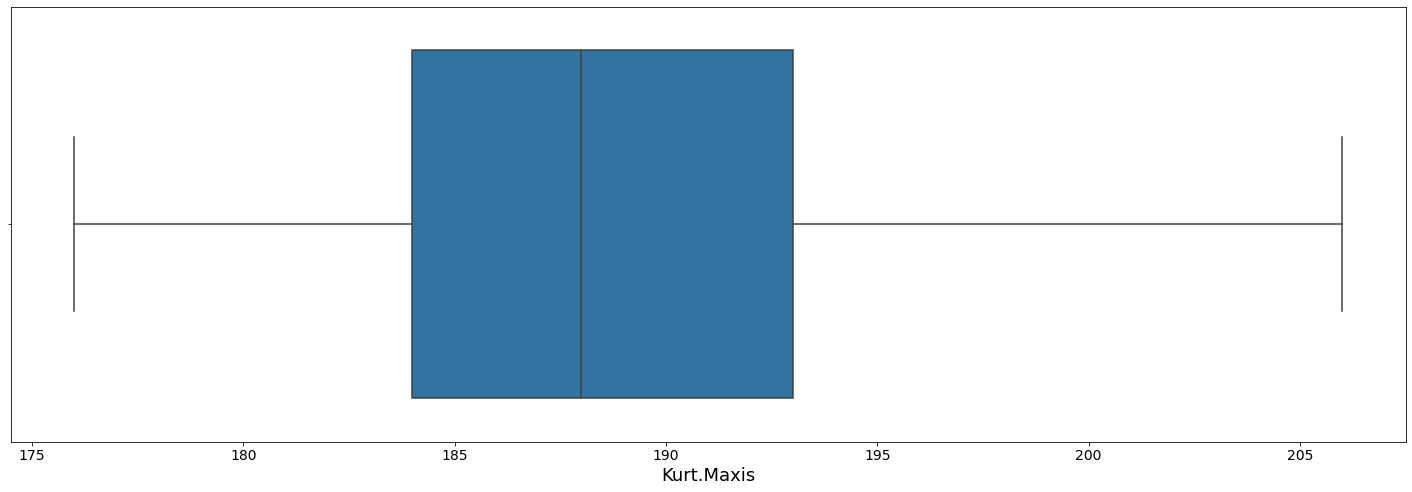

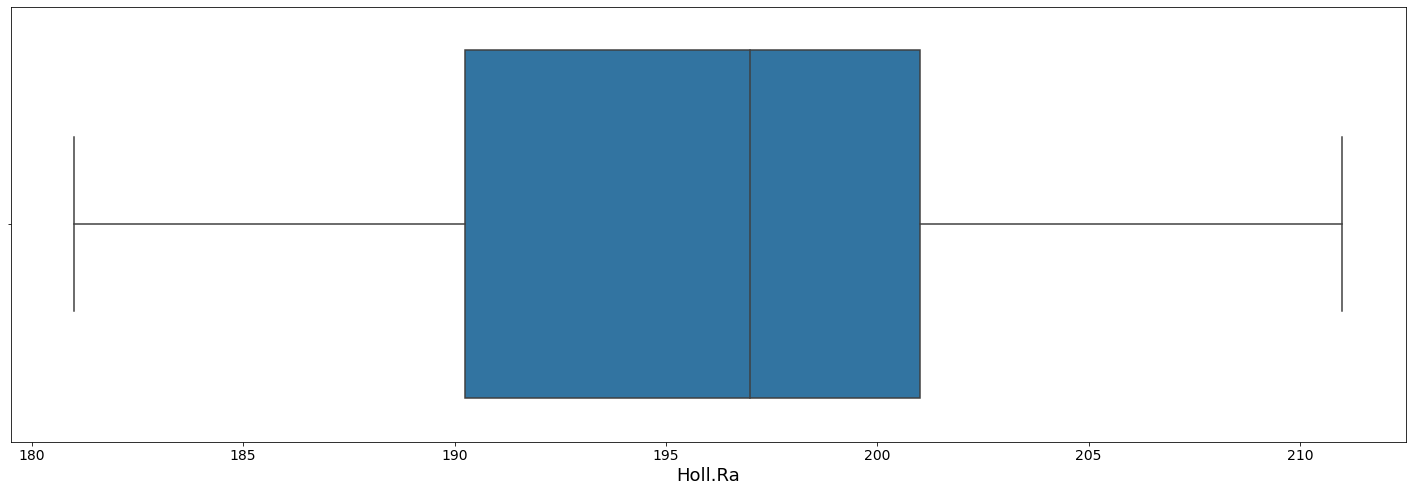

In [5]:
# mostra o boxplot

for i in Colunas:
    plt.figure(figsize=(25, 8))
    sns.boxplot(x=i,data=data)
    plt.xlabel(i, fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show(True)

In [6]:
medidas = data.describe()

#limites superiores e inferiores para cada coluna 
limite_inf = []
limite_sup = []
ls = []
li = []
c = 1.5
#limites superiores e inferiores dos espaços interquatílico
for i in Colunas:
    li.append(medidas[i]['25%'] -c*(medidas[i]['75%'] - medidas[i]['25%']))
    ls.append(medidas[i]['75%'] +c*(medidas[i]['75%'] - medidas[i]['25%']))

limite_inf.append(li)
limite_inf = pd.DataFrame(limite_inf, columns=Colunas)
limite_sup.append(ls)
limite_sup = pd.DataFrame(limite_sup, columns=Colunas)
limite_sup[Colunas[0]][0]

119.5

In [7]:
# Verificando os dados em busca do numero de observações com algum outlier
flag = False
rows_out = []
for i in range(data.shape[0]):
    flag = False
    verifique = data.iloc[i]
    for j in Colunas:
        if(verifique[j] > limite_sup[j][0]): flag = True
        if(verifique[j] < limite_inf[j][0]): flag = True
    if(flag): rows_out.append(i)
len(rows_out)

33

### Questão 5 e 6

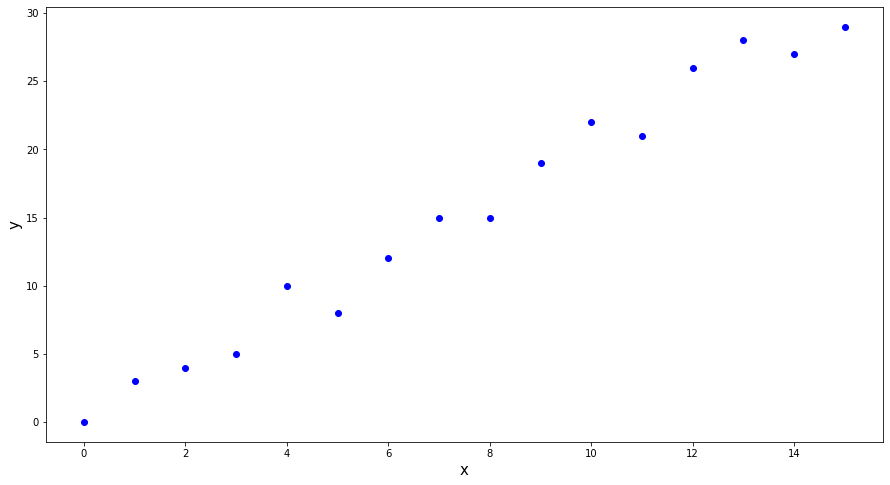

In [8]:
# Dados X, Y no enunciado temos o seu plot
x = np.array(range(16)) 
y = np.array([0, 3, 4, 5, 10, 8, 12, 15, 15, 19,22,21,26,28,27,29]) 
# Plot figura
plt.figure(figsize=(15, 8))
plt.plot(x, y, 'bo')
plt.xlabel("x", fontsize = 15)
plt.ylabel("y", fontsize = 15)
plt.show(True)  

Coeficientes:
b_0 = 0.16176470588235325  
b_1 = 2.011764705882353
R2: 0.9807890654479896


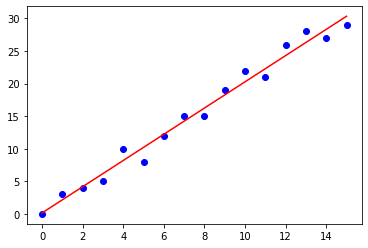

In [9]:
### Algoritmos visto em aula
# funcao que estima os coeficientes betas
def estimate_coef(x, y): 
    # número de observações
    n = np.size(x) 
    # Médias
    m_x, m_y = np.mean(x), np.mean(y) 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
    # calcula os coeficientes de regressão
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
    return(b_0, b_1) 

# função para mostrar os dados e o ajuste linear
def plot_regression_line(x, y, b): 
    # mostra os dados
    plt.scatter(x, y, color = "b", marker = "o", s = 50) 
    # prediz os valores
    y_pred = b[0] + b[1]*x 
    # mostra a reta de regressão
    plt.plot(x, y_pred, color = "r") 
    plt.xlabel('x', fontsize = 15) 
    plt.ylabel('y', fontsize = 15) 
    plt.show(True) 

def R2(x,y,b):
    n = len(y)
    c1 = 0
    c2 = 0
    ym = np.mean(y)
    for i in range(0,n):
        y_pred = b[0]+ x[i]*b[1] # valor predito
        c1 = c1 + (y[i]-y_pred)**2
        c2 = c2 + (y[i]-ym)**2
    R2 = 1 - c1/c2
    return R2
    
# estima os coeficientes
b = estimate_coef(x, y) 
print("Coeficientes:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 
print('R2:', R2(x,y,b))


# mostra o ajuste linear
plt.plot(x,y,'bo')
plt.plot(x, b[0] + b[1]*x, 'r-')

### Questão Q9

In [10]:
# Carregando dados
data = pd.read_csv('data/vertebralcolumn-2C.csv', header=(0))
data.head(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [11]:
# Definindo atributos e classe respota
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)
atributos = list(data.columns)
classes, atributos, data.shape

(array(['Abnormal', 'Normal'], dtype='<U8'),
 ['pelvic_incidence',
  'pelvic_tilt',
  'lumbar_lordosis_angle',
  'sacral_slope',
  'pelvic_radius',
  'degree_spondylolisthesis',
  'class'],
 (310, 7))

In [12]:
# Convertendo dados e separando dados de teste e treino
data  =  data.to_numpy()
y = data[:,-1]
x = data[:,0:data.shape[1]-1] 


In [13]:
p = 0.8 # porção de dados de treinamento
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = p, random_state = 42)

In [14]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score = metrics.accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.7903225806451613


### Questão 10

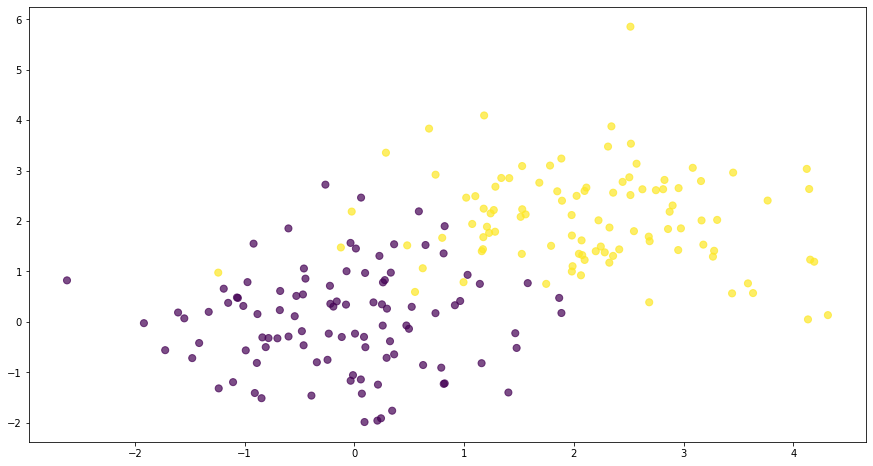

In [15]:
# Gera os dados em duas dimensões 
n_samples = 100 # número de observações 
centers = [(0,0),(2,2)]
X,y = skdata.make_blobs(n_samples=200,n_features=2, cluster_std=1.0,centers=centers, shuffle=False , random_state=42)
# mostra os dados gerados
plt.figure(figsize=(15,8)) 
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7) 
plt.show(True) 

In [16]:
p = 0.8 # porção de dados de treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)
classes = [0,1]

In [17]:
# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
# Algoritmo do classificador Bayesiano não-paramétrico
h = 1
for i in np.arange(0, len(classes)): # Para cada classe
    print("Classe: ", i)
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    print(elements)
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = X_train[elements,:][0] # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,X_test.shape[0]): # para cada observacao no conjunto de teste
        x = X_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]
        
print(P)

Classe:  0
(array([  0,   2,   3,   6,   7,   9,  12,  15,  17,  19,  21,  22,  23,
        24,  26,  28,  30,  33,  36,  40,  41,  42,  45,  47,  49,  50,
        53,  54,  57,  58,  60,  61,  66,  67,  71,  74,  76,  77,  79,
        80,  84,  85,  88,  89,  91,  92,  94,  96,  98, 103, 104, 105,
       106, 108, 109, 112, 113, 114, 115, 118, 119, 124, 125, 127, 129,
       130, 131, 132, 133, 137, 140, 141, 146, 148, 149, 152, 154, 156,
       157], dtype=int64),)
Classe:  1
(array([  1,   4,   5,   8,  10,  11,  13,  14,  16,  18,  20,  25,  27,
        29,  31,  32,  34,  35,  37,  38,  39,  43,  44,  46,  48,  51,
        52,  55,  56,  59,  62,  63,  64,  65,  68,  69,  70,  72,  73,
        75,  78,  81,  82,  83,  86,  87,  90,  93,  95,  97,  99, 100,
       101, 102, 107, 110, 111, 116, 117, 120, 121, 122, 123, 126, 128,
       134, 135, 136, 138, 139, 142, 143, 144, 145, 147, 150, 151, 153,
       155, 158, 159], dtype=int64),)
               0         1
0   4.305585e-04  0

In [18]:
y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred)
# calcula a acuracia
score = metrics.accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 0.95


### Questão 11

In [19]:
data = pd.read_csv('data/winequality-red.csv', header=(0))
print("Existencia de NaN: ", data.isnull().values.any())
data.head()

Existencia de NaN:  False


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]))  
classes


array([5, 6, 7, 4, 8, 3], dtype=int64)

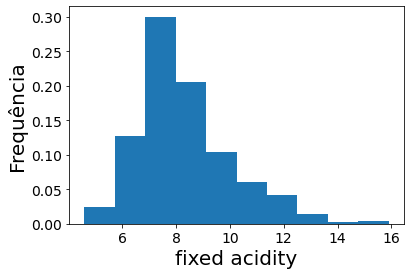

Estatistica=0.942, p=0.000
Não-Normal (rejeita H0)


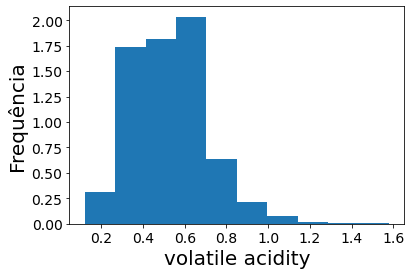

Estatistica=0.974, p=0.000
Não-Normal (rejeita H0)


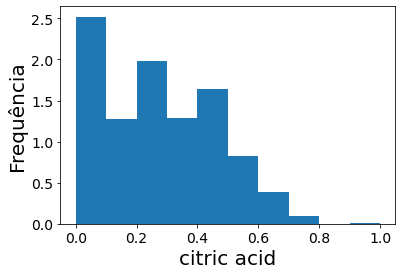

Estatistica=0.955, p=0.000
Não-Normal (rejeita H0)


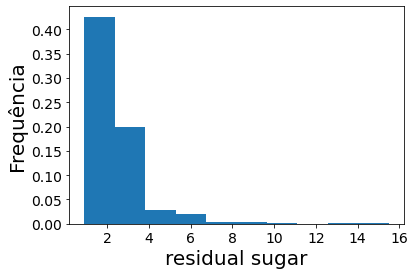

Estatistica=0.566, p=0.000
Não-Normal (rejeita H0)


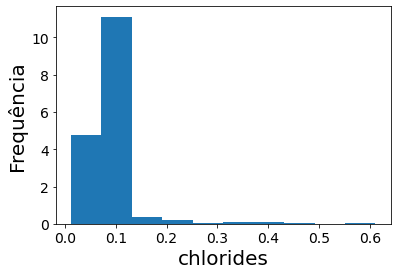

Estatistica=0.484, p=0.000
Não-Normal (rejeita H0)


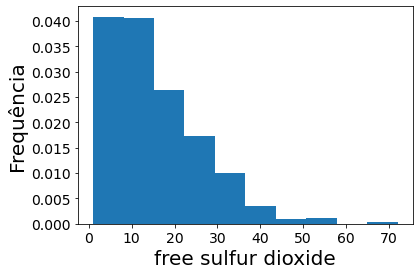

Estatistica=0.902, p=0.000
Não-Normal (rejeita H0)


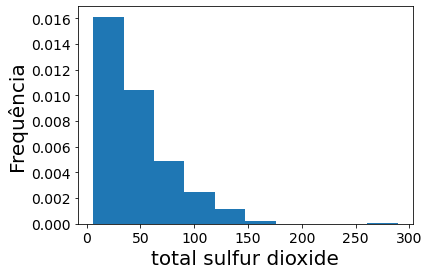

Estatistica=0.873, p=0.000
Não-Normal (rejeita H0)


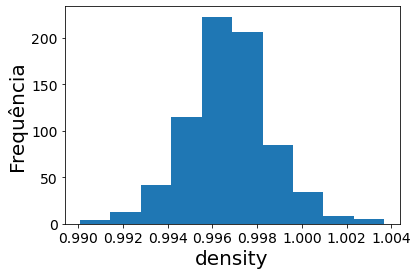

Estatistica=0.991, p=0.000
Não-Normal (rejeita H0)


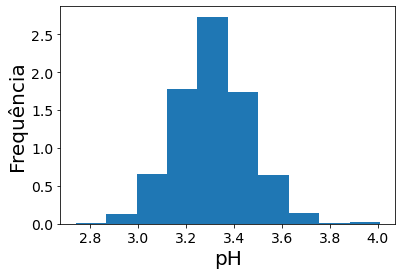

Estatistica=0.993, p=0.000
Não-Normal (rejeita H0)


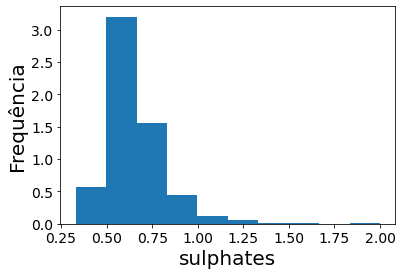

Estatistica=0.833, p=0.000
Não-Normal (rejeita H0)


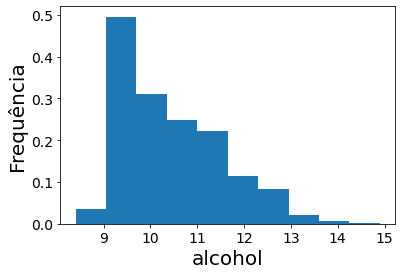

Estatistica=0.929, p=0.000
Não-Normal (rejeita H0)


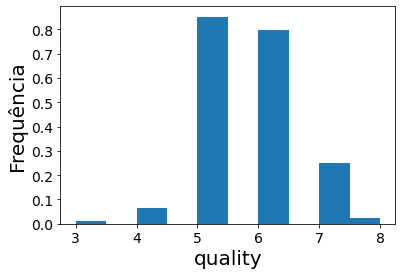

Estatistica=0.858, p=0.000
Não-Normal (rejeita H0)


In [21]:
attributes = list(data.columns)
for i in attributes:    
    plt.hist(data[i], density=True,)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(i,fontsize = 20) 
    plt.ylabel("Frequência", fontsize = 20) 
    plt.show(True)
    # Normalidade test
    stat, p = shapiro(data[i])
    print('Estatistica=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Normal (fail to reject H0)')
    else:
        print('Não-Normal (rejeita H0)')

In [22]:
print("Número de linhas e colunas na matriz de atributos:", data.shape)
data.head(10)

Número de linhas e colunas na matriz de atributos: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [23]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [24]:
#Convertendo dados para numpy, e separando atributos de classes
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

In [25]:
#Normalizando dados 
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X.shape

(1599, 11)

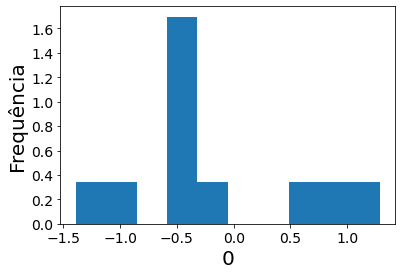

Estatistica=0.909, p=0.239
Normal (fail to reject H0)


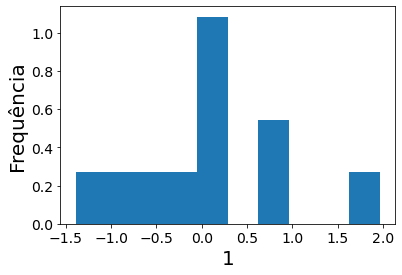

Estatistica=0.967, p=0.851
Normal (fail to reject H0)


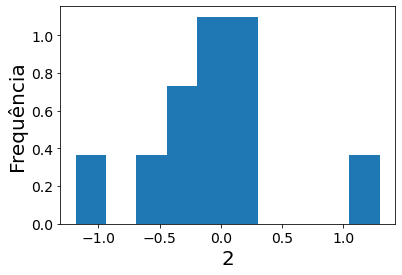

Estatistica=0.914, p=0.272
Normal (fail to reject H0)


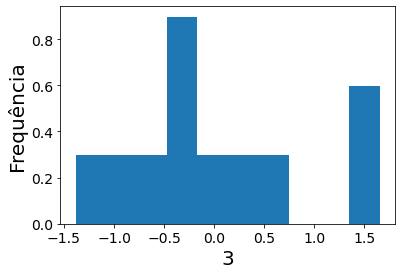

Estatistica=0.949, p=0.630
Normal (fail to reject H0)


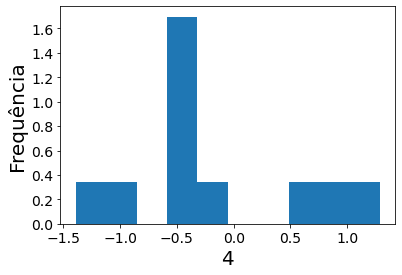

Estatistica=0.909, p=0.239
Normal (fail to reject H0)


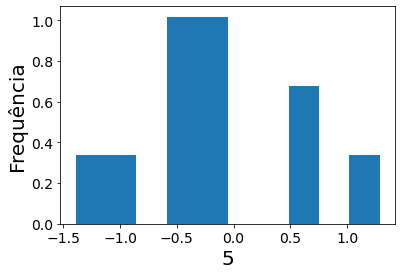

Estatistica=0.944, p=0.567
Normal (fail to reject H0)


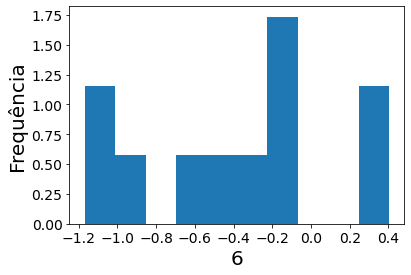

Estatistica=0.934, p=0.450
Normal (fail to reject H0)


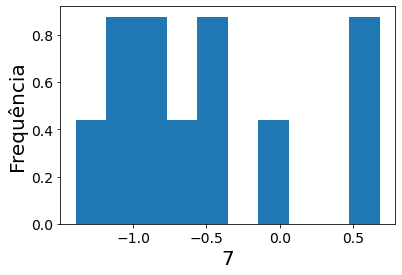

Estatistica=0.933, p=0.444
Normal (fail to reject H0)


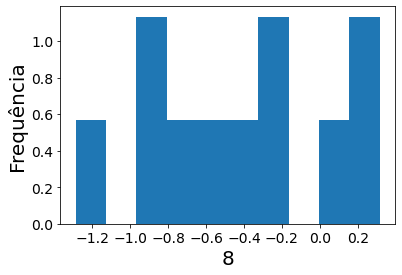

Estatistica=0.964, p=0.815
Normal (fail to reject H0)


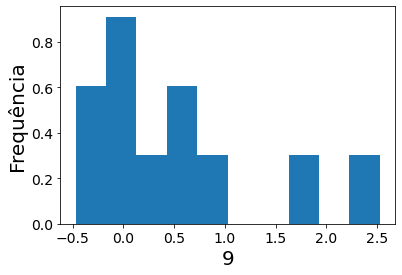

Estatistica=0.879, p=0.100
Normal (fail to reject H0)


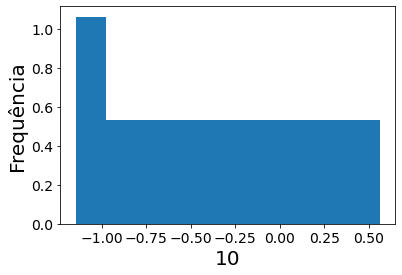

Estatistica=0.961, p=0.782
Normal (fail to reject H0)


In [26]:
teste = range(X.shape[1])
for i in teste:    
    plt.hist(X[i], density=True,)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(i,fontsize = 20) 
    plt.ylabel("Frequência", fontsize = 20) 
    plt.show(True)
    # Normalidade test
    stat, p = shapiro(X[i])
    print('Estatistica=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Normal (fail to reject H0)')
    else:
        print('Não-Normal (rejeita H0)')

In [27]:
#Descrição dos dados após normalização
print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [ 3.55493551e-16  1.73303106e-16 -8.88733878e-17 -1.24422743e-16
  2.13296131e-16 -6.22113715e-17  4.44366939e-17 -3.47317200e-14
  2.86172309e-15  6.75437748e-16  1.06648065e-16]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [28]:
#Separando dados de teste e treino
p = 0.8 # fracao de elementos no conjunto de treinamento
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)
len(y_test), len(y_train)

(320, 1279)

In [29]:
#Classificador Baysiano visto em aula
# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 

Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = x_train[elements,:][0] # Elementos no conjunto de treinamento
    m = np.mean(Z, axis = 0) # Vetor media
    cv = np.cov(np.transpose(Z)) # Matriz de covariancia
    for j in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
        x = x_test[j,:]
        # calcula a probabilidade pertencer a cada classe
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]
P

,5,6,7,4,8,3
0,1.059450e-07,8.336785e-08,3.249693e-09,1.775771e-08,0.000000e+00,4.179965e-07
1,6.610278e-09,2.380790e-10,7.021192e-11,4.033681e-11,0.000000e+00,6.400033e-21
2,3.799831e-10,5.329517e-09,2.730248e-09,4.124657e-11,0.000000e+00,3.282720e-15
3,2.280526e-08,1.347716e-08,6.882662e-09,1.310902e-10,8.384616e-40,2.026314e-10
4,6.123014e-08,2.199260e-07,1.322107e-07,2.099006e-08,1.486926e-20,1.443871e-11
...,...,...,...,...,...,...
315,1.076285e-08,5.845374e-08,1.945596e-08,7.817147e-09,0.000000e+00,8.073221e-09
316,1.186199e-11,1.021336e-12,2.758352e-15,4.548053e-22,8.974229e-77,1.448725e-25
317,1.025814e-07,5.658844e-08,4.589989e-09,8.246432e-09,0.000000e+00,3.465331e-10
318,2.070265e-09,3.269723e-08,3.009797e-08,9.460081e-12,1.560698e-302,1.429715e-25


In [30]:
y_pred = []
for i in np.arange(0, P.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(P.columns[c])
y_pred = np.array(y_pred)

score = metrics.accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.44375
